# Setup #

In [60]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')

# Detection algorithm works with an NxN matrix
N = 
#N is a power of 2

# Helper Functions #

In [2]:
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()

In [3]:
#Normalize -- squared amplitudes must sum to 1
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Image Preprocessing #

Raw Image info: (512, 512, 3)
Raw Image datatype: uint8


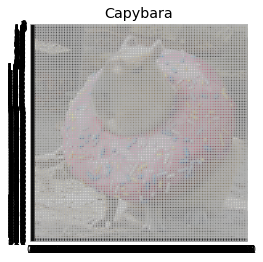

In [28]:
#Input Processing to np array

img_raw = plt.imread('test_images/squarecapybara.jpg')
# img_raw = plt.imread('/test_images/test_image1.jpg')
img_raw = np.asarray(img_raw)

# print(img_raw)

n, m, k = img_raw.shape
print('Raw Image info:', img_raw.shape)
print('Raw Image datatype:', img_raw.dtype)
plot_image(img_raw, "Capybara")

if n != m:
    raise Exception("Image must be square")

if n % N != 0:
    raise Exception(f"Image cannot be converted to an {N} by {N} matrix")

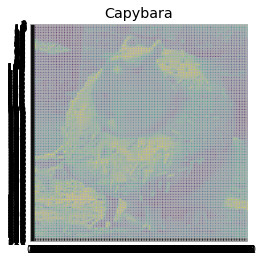

[[0.12156863 0.10980392 0.09803922 ... 1.41960784 1.11372549 1.30196078]
 [0.12156863 0.10980392 0.08627451 ... 1.85490196 1.71372549 1.57254902]
 [0.10980392 0.09803922 0.0745098  ... 1.74901961 1.90196078 1.86666667]
 ...
 [1.41960784 1.44313725 1.50196078 ... 1.65490196 1.51372549 1.54901961]
 [1.42745098 1.2745098  1.39607843 ... 1.81960784 1.5372549  1.81960784]
 [1.4627451  1.28627451 1.39215686 ... 1.74901961 1.74901961 1.85490196]]


In [62]:
# we need to "reduce" each sz X sz grid
sz = int(n / N)
img = np.zeros(shape=(N, N))

for i in range(0, n, sz):
    for j in range(0, n, sz):
        val = 0
        for k in range(0, sz):
            val += np.sum(img_raw[i + k][j : j + sz][0]) / 255
#             val += np.sum(img_raw[i + k][j : j + sz][1]) / 255
#             val += np.sum(img_raw[i + k][j : j + sz][2]) / 255
        img[i//sz][j//sz] = val

plot_image(img, "Capybara")
print(img)

In [ ]:
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)